# **SIBER-RISK Strong Motion Database - Matlab/Octave example**

In this Jupyter notebook we will explore the data structure for the *.mat* files of the SIBER-RISK's database using Matlab/Octave.

## **1. Dataset: 20240629_5.0M_23.97S_70.25W_44.0KM**

The *event_id* is composed by the date of the event (*2029-06-29*), its magnitude (*5.0*), hypocenter latitude (*-23.97*), hypocenter longitude (*-70.25*) and depth (*44.0*).

In [1]:
filename = '20240629_5.0M_23.97S_70.25W_44.0KM.mat';
load(filename);

You can recover the *event_id* directly in Matlab/Octave:

In [2]:
fprintf('Event ID: %s', event_id);

Event ID: 20240629_5.0M_23.97S_70.25W_44.0KM

### **1.1 License of use**

In [3]:
fprintf(licensing)

This SIBER-RISK Strong Motion Database is made available under the Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International Public License: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode. Any rights in individual contents of the database are licensed under the Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International Public License: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode

### **1.2 How to cite this database**

In [4]:
fprintf(cite)

Sebastián Castro, Roberto Benavente, Jorge G. F. Crempien, Gabriel Candia, Juan Carlos de la Llera; A Consistently Processed Strong‐Motion Database for Chilean Earthquakes. Seismological Research Letters 2022;; 93 (5): 2700–2718. doi: https://doi.org/10.1785/02202

### **1.3 Database url**

In [5]:
fprintf(databaseURL)

https://doi.org/10.7764/datasetUC/ING-UC.1170836_1

## **2. Stations**

All the station keys start with the prefix *st* followed by a zero padded number from *0* to *n-1*, being *n* the total number of stations recorded.

In [6]:
n = 0;
while exist(strcat('st', num2str(n, '%0.2i'))) == 1
    n = n + 1;
end
fprintf('Total stations: %i', n)

Total stations: 2

### **2.1 Data structure**

Each station is a structure with the following keys

#### **2.1.1 Event properties**

| Key | Description |
| -- | -- |
| magnitude | Reported event magnitude |
| hypocenter_lon | Hyponcenter longitude in decimals |
| hypocenter_lat | Hypocenter latitude in decimals |
| depth | Hypocenter depth in kilometers |
| event_type | Event type (interface, intraslab, crustal or undetermined) |

#### **2.1.2 Station properties**

| Key | Description |
| -- | -- |
| station_name | Station name or *Unknown* |
| station_code | Station code |
| station_lon | Station longitude in decimals |
| station_lat | Station latitude in decimals |
| vs30 | Station Vs30 in m/s |
| azimuth | Station azimuth in degrees |
| Rhypo | Hypocentral distance in kilometers |
| Repi | Epicentral distance in kilometers |
| Rrup | Rupture distance in kilometers | 
| Rjb | Joyner-Boore distance in kilometers |

#### **2.1.3 Record properties**

Each station has three channels (1, 2 and 3), with channel 3 being the vertical one. Replace the suffix *i* with your channel of interest.

| Key | Description |
| -- | -- |
| starttime | Start date and time of the records in format *YYYY-MM-DDThh:mm:ss.msZ* |
| dt | Temporal discretization in seconds |
| p_wave | Position of the P-Wave arrival |
| component_*i* | Name of the component *i* |
| corner_freqs_*i* | Corner frequencies used in the filtered acceleration for component *i* |
| acc_uncorrected_*i* | Uncorrected acceleration for component *i* |
| acc_corrected_*i* | Corrected acceleration for component *i* |
| acc_filtered_*i* | Filtered acceleration for component *i* |

#### **2.1.3 Miscellaneous**

| Key | Description |
| -- | -- |
| units | Units used in the event, station and record properties |
| last_update | Date and time of the last update |

### **2.2 Data visualization**

The following code shows how to compute and visualize the velocity and displacement for a filtered record.

In [7]:
% Choose the station and component of your interest
station   = st00;
component = 1;

% Properties
dt     = station.dt;
p_wave = station.p_wave;
n      = length(station.(strcat('acc_filtered_', num2str(component))));
t      = linspace(0., (n-1)*dt, n);
label  = station.(strcat('component_', num2str(component)));

#### **Acceleration**

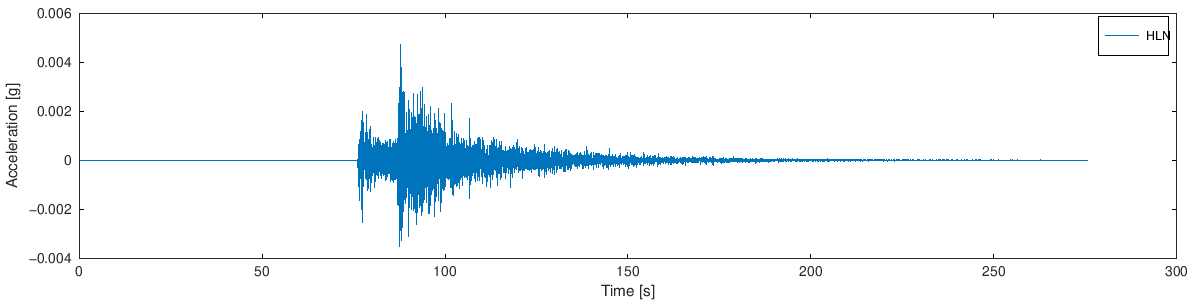

In [8]:
acc = station.(strcat('acc_filtered_', num2str(component)));

figure('units', 'pixels', 'position', [0, 0, 1200, 300])
plot(t, acc/9.81)
set(gca,'fontsize', 5)
xlabel('Time [s]')
ylabel('Acceleration [g]')
legend(label)

#### **Velocity**

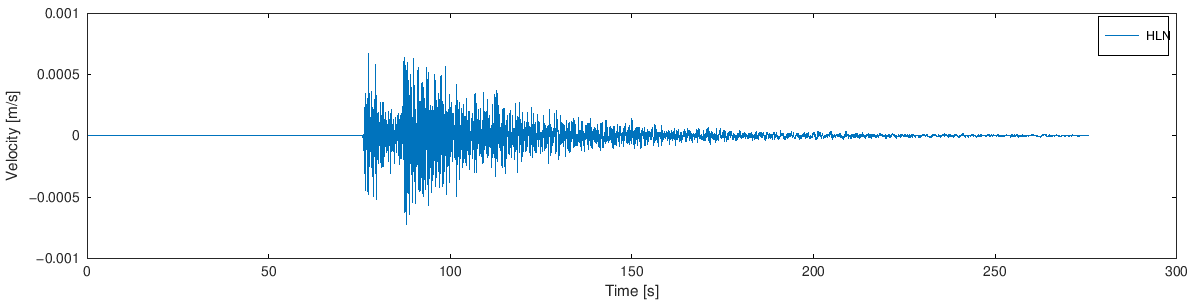

In [9]:
vel = cumtrapz(t, acc);
if p_wave > 0
    vel = vel - mean(vel(1:p_wave));
end

figure('units', 'pixels', 'position', [0, 0, 1200, 300])
plot(t, vel)
set(gca,'fontsize', 5)
xlabel('Time [s]')
ylabel('Velocity [m/s]')
legend(label)

#### **Displacement**

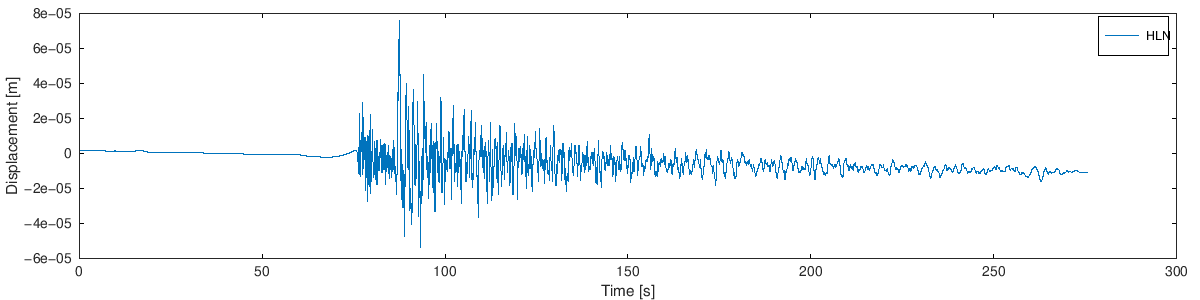

In [10]:
dis = cumtrapz(t, vel);
if p_wave > 0
    dis = dis - mean(dis(1:p_wave));
end

figure('units', 'pixels', 'position', [0, 0, 1200, 300])
plot(t, dis)
set(gca,'fontsize', 5)
xlabel('Time [s]')
ylabel('Displacement [m]')
legend(label)